In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline


In [110]:
df = pd.read_csv('Credit.csv', index_col = 0)
df = df[df.Limit > 3500]

In [111]:
df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


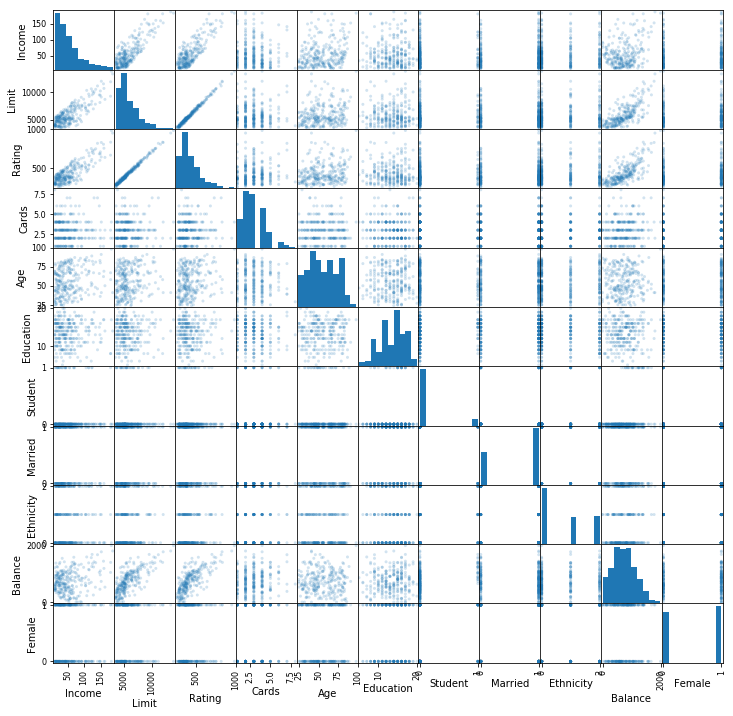

In [113]:
scatter_matrix(df,alpha=0.2, figsize=(12,12))
None

In [119]:
y = df.Balance
"""Use Capital X (y is vector, x could be many so it is a Matrix, matrixes are capital leters)"""
"""X = df.Limit"""
"""X = df[['Limit','Rating']]"""
"""X = df.Limit.to_frame()
X['Rating'] = df.Rating
X['Income'] = df.Income"""
X = pd.DataFrame(df, columns = ['Rating','Income','Limit','Student'])
X = sm.add_constant(X)
X.head(3)


,const,Rating,Income,Limit,Student
1,1.0,283,14.891,3606,0
2,1.0,483,106.025,6645,1
3,1.0,514,104.593,7075,0


In [120]:
model = sm.OLS(y,X).fit()

In [121]:
"""This will give the slope"""
model.params


const     -721.436891
Rating       1.465357
Income     -10.016818
Limit        0.225838
Student    498.941211
dtype: float64

In [122]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6599.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.35e-261
Time:                        15:17:19   Log-Likelihood:                -1358.1
No. Observations:                 267   AIC:                             2726.
Df Residuals:                     262   BIC:                             2744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -721.4369     11.733    -61.486      0.000    -744.541    -698.333
Rating         1.4654      0.199      7.370      0.000       1.074       1.857
Income       -10.0168      0.110    -91.014      0.000     -10.234      -9.800
Limit          0.2258      0.014     16.670      0.000       0.199       0.253
Student      498.9412      7.932     62.905      0.000     483.323     514.559
==============================================================================
Omnibus:                       20.831   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.973
Skew:                           0.572   Prob(JB):                     1.39e-06
Kurtosis:                       4.056   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
df.describe.t()


AttributeError: 'function' object has no attribute 't'

In [112]:
"""df_new = pd.concat ([df, pd.get_dummies(df['Gender'])], axis = 1)
df_new = df_new.drop('Gender', axis=1)
df_new = df_new.drop('Female', axis=1)
df_new = pd.concat ([df_new, pd.get_dummies(df_new['Student'])], axis = 1)
#df_new = df_new.drop('Gender', axis=1)

"""
df = pd.read_csv('credit.csv', index_col=0)
df = df[df.Limit > 3500]
df['Student'] = df.Student.map({'No':0, 'Yes':1})
df['Married'] = df.Married.map({'No':0, 'Yes':1})
df['Ethnicity'] = df.Ethnicity.map({'Caucasian':0, 'Asian':1, 'African American':2})
df['Female'] = pd.get_dummies(df.Gender)['Female']
df.drop(['Gender'], axis=1, inplace=True)
df.head(3)




,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0
